In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\nurmukhamed.timuruly\OneDrive - Freedom Holding Corporation\Рабочий стол\практика\practice_pars_and_ml\events.csv")

In [3]:
df.describe()

,Название,Цена (₸),Категория,Партнёр,Дата,Город
count,269,269,269,269,269,269
unique,248,63,29,63,165,9
top,Концерт Jennifer Lopez в Астане,3 000,Концерты в EverJazz,Jazz.Club.EverJazz,01.08.2025 19:00:00,almaty
freq,6,47,31,31,7,194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Название   269 non-null    object
 1   Цена (₸)   269 non-null    object
 2   Категория  269 non-null    object
 3   Партнёр    269 non-null    object
 4   Дата       269 non-null    object
 5   Город      269 non-null    object
dtypes: object(6)
memory usage: 12.7+ KB


In [5]:
df.isna().sum()

Название     0
Цена (₸)     0
Категория    0
Партнёр      0
Дата         0
Город        0
dtype: int64

In [6]:
df["Цена (₸)"] = df["Цена (₸)"].str.replace("₸", "", regex=False) \
                                .str.replace(" ", "", regex=False) \
                                .astype(float)

In [7]:
df["Цена (₸)"].mean()

np.float64(16554.97026022305)

In [8]:
df.columns

Index(['Название', 'Цена (₸)', 'Категория', 'Партнёр', 'Дата', 'Город'], dtype='object')

In [9]:
df = df.rename(columns={
    "Цена (₸)" : "price",
    "Название" : "name",
    "Категория": "category",
    "Партнёр": "partner",
    "Дата": "date"
})

In [10]:
# Какой процент данных мы удаляем?
100*(22/193)

11.398963730569948

In [11]:
df

,name,price,category,partner,date,Город
0,Фестиваль Vincent OpenFest 2025 в Каскелене,10000.0,Фестивали,Camila (м.п),06.07.2025 16:00:00,almaty
1,Шоу Ирины Кайратовны на Алаколе,40000.0,Концерты,Мухаббат Comfort,12.07.2025 21:00:00,almaty
2,Большой стендап-концерт алматинских комиков,4000.0,Мероприятия от Almaty Stand Up,Максат Stand Up_Almaty,06.07.2025 21:30:00,almaty
3,Музыкальный этно-фестиваль Qunar Etno Fest 2025,5000.0,Фестивали,Qunar Fest,19.07.2025 15:00:00,almaty
4,Теннисный фестиваль Almaty Open ATP 250 (13 ок...,3500.0,Спорт,Владимир (м.п),13.10.2025 11:00:00,almaty
...,...,...,...,...,...,...
264,"Турбо-тур «Ыбык, Караман Ата, Бозжыра, Кызылкуп»",25000.0,Туризм,Мангыстау Сафари,02.07.2025 07:45:00,aktau
265,"Тур «Ыбык, Караман ата»",11500.0,Туризм,Мангыстау Сафари,03.07.2025 12:45:00,aktau
266,Open-Air Drift-show,7000.0,Концерты,Азамат Open-Air Drift-show,06.07.2025 12:00:00,kokshetau
267,Двойной стендап-концерт Ербола Бекишева и Сыры...,4000.0,Stand Up,Виталий Stand Up Soultustik,12.07.2025 20:00:00,taraz


In [12]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S', errors='coerce')


In [13]:
df["month"] = df['date'].dt.month

In [14]:
df

,name,price,category,partner,date,Город,month
0,Фестиваль Vincent OpenFest 2025 в Каскелене,10000.0,Фестивали,Camila (м.п),2025-07-06 16:00:00,almaty,7
1,Шоу Ирины Кайратовны на Алаколе,40000.0,Концерты,Мухаббат Comfort,2025-07-12 21:00:00,almaty,7
2,Большой стендап-концерт алматинских комиков,4000.0,Мероприятия от Almaty Stand Up,Максат Stand Up_Almaty,2025-07-06 21:30:00,almaty,7
3,Музыкальный этно-фестиваль Qunar Etno Fest 2025,5000.0,Фестивали,Qunar Fest,2025-07-19 15:00:00,almaty,7
4,Теннисный фестиваль Almaty Open ATP 250 (13 ок...,3500.0,Спорт,Владимир (м.п),2025-10-13 11:00:00,almaty,10
...,...,...,...,...,...,...,...
264,"Турбо-тур «Ыбык, Караман Ата, Бозжыра, Кызылкуп»",25000.0,Туризм,Мангыстау Сафари,2025-07-02 07:45:00,aktau,7
265,"Тур «Ыбык, Караман ата»",11500.0,Туризм,Мангыстау Сафари,2025-07-03 12:45:00,aktau,7
266,Open-Air Drift-show,7000.0,Концерты,Азамат Open-Air Drift-show,2025-07-06 12:00:00,kokshetau,7
267,Двойной стендап-концерт Ербола Бекишева и Сыры...,4000.0,Stand Up,Виталий Stand Up Soultustik,2025-07-12 20:00:00,taraz,7


In [15]:
max_na = df.isna().sum().max()

max_na


0

In [16]:
100 * max_na / len(df)

0.0

In [17]:
df["month"].unique()

array([ 7, 10,  8,  9, 11], dtype=int32)

In [18]:
df = df.dropna()

In [19]:
df['category'].unique()

array(['Фестивали', 'Концерты', 'Мероприятия от Almaty Stand Up', 'Спорт',
       'Stand Up', 'Образование',
       'События в Almaty Central Stand Up Club',
       'События от Punch StandUp Club', 'Вечеринки',
       'Концерты в EverJazz', 'Кинопоказы', 'События от Stand Up Camp',
       'Развлечения', 'Туризм', 'Спектакли в арт-убежище BUNKER',
       'Спектакли в театре 2act', 'Туры от Blast Tour', 'Мастер-классы',
       'Туры от Melon Travel', 'Туры от Grande Voyage', 'Театр',
       'Мероприятия в театре La Bohême', 'Туры от MOCEAN Travel',
       'Игры (квизы, мафия и другое)', 'Stand up',
       'Мероприятия в стендап-баре Pozitiv', 'Экскурсии и туры', 'Кино',
       'Вечеринки в заведениях'], dtype=object)

In [20]:
pd.get_dummies(df)

,price,date,month,name_All stars jam session – Джазовая музыка и импровизация,name_Almaty BirdFest 2025,name_English StandUp (2 July),name_Jazz Colors - Reversio. Jazz & Bossa,name_Jazz Colours — Hot & Funky,name_Open Mic на английском от Comedy Point и English Comedy Kz,name_Open-Air Drift-show,...,partner_Юлия (М.П.),Город_aktau,Город_aktobe,Город_almaty,Город_astana,Город_karaganda,Город_kokshetau,Город_shymkent,Город_taraz,Город_uralsk
0,10000.0,2025-07-06 16:00:00,7,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,40000.0,2025-07-12 21:00:00,7,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,4000.0,2025-07-06 21:30:00,7,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,5000.0,2025-07-19 15:00:00,7,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,3500.0,2025-10-13 11:00:00,10,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,25000.0,2025-07-02 07:45:00,7,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
265,11500.0,2025-07-03 12:45:00,7,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
266,7000.0,2025-07-06 12:00:00,7,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
267,4000.0,2025-07-12 20:00:00,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [21]:
X = pd.get_dummies(df.drop('category',axis=1),drop_first=True)
y = df['category']

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
X_train = X_train.drop(columns=['date'])
X_test = X_test.drop(columns=['date'])

# 2. Создание и обучение модели
model = RandomForestClassifier(
    criterion='entropy',       # мера информативности: 'gini' или 'entropy'
    max_depth=10,               # максимально 8 уровней
    min_samples_split=10,      # для расщепления узла нужно ≥10 объектов
    min_samples_leaf=6,        # в каждом листе ≥5 объектов
    max_features='log2',       # при сплите смотрим √(кол-во фич)
    class_weight='balanced',   # компенсировать дисбаланс классов
    random_state=42
)


grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# 3. Предсказание и оценка
Y_pred = grid.predict(X_train)
print(classification_report(y_train, Y_pred))



c:\Users\nurmukhamed.timuruly\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


                                        precision    recall  f1-score   support

                              Stand Up       1.00      0.83      0.91         6
                              Stand up       1.00      0.80      0.89         5
                             Вечеринки       1.00      1.00      1.00         3
                Вечеринки в заведениях       0.50      1.00      0.67         2
          Игры (квизы, мафия и другое)       0.90      1.00      0.95         9
                            Кинопоказы       0.83      1.00      0.91         5
                              Концерты       1.00      0.80      0.89        15
                   Концерты в EverJazz       1.00      1.00      1.00        19
                         Мастер-классы       1.00      1.00      1.00         4
    Мероприятия в стендап-баре Pozitiv       0.86      1.00      0.92         6
        Мероприятия в театре La Bohême       1.00      1.00      1.00         4
        Мероприятия от Almaty Stand Up 

In [24]:
from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
cm_df = pd.DataFrame(cm, index=grid.classes_, columns=grid.classes_)

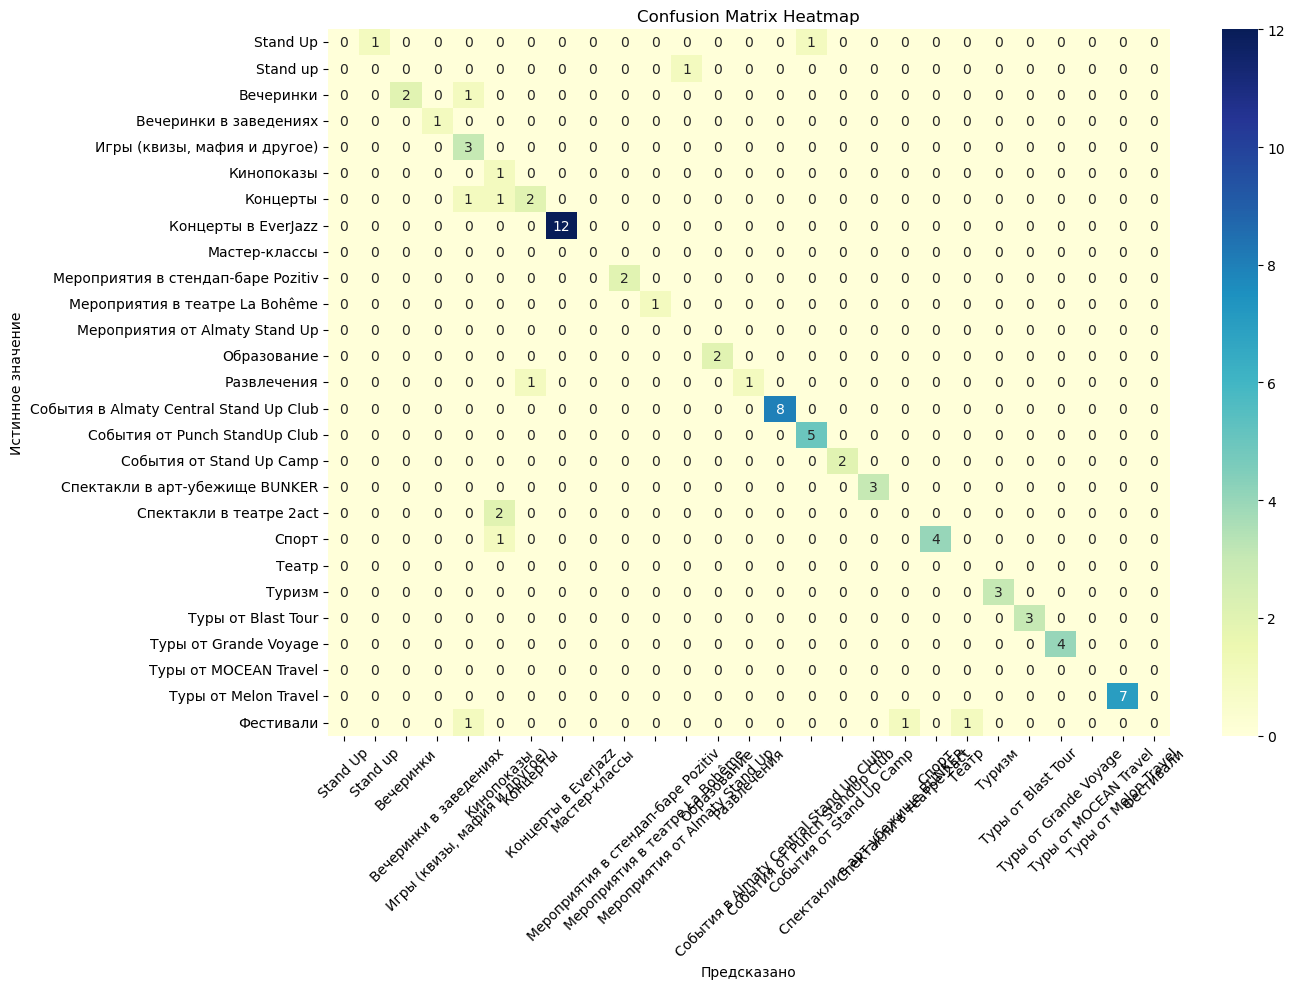

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Предсказано')
plt.ylabel('Истинное значение')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_train, grid.predict(X_train)))


                                        precision    recall  f1-score   support

                              Stand Up       1.00      0.83      0.91         6
                              Stand up       1.00      0.80      0.89         5
                             Вечеринки       1.00      1.00      1.00         3
                Вечеринки в заведениях       0.50      1.00      0.67         2
          Игры (квизы, мафия и другое)       0.90      1.00      0.95         9
                            Кинопоказы       0.83      1.00      0.91         5
                              Концерты       1.00      0.80      0.89        15
                   Концерты в EverJazz       1.00      1.00      1.00        19
                         Мастер-классы       1.00      1.00      1.00         4
    Мероприятия в стендап-баре Pozitiv       0.86      1.00      0.92         6
        Мероприятия в театре La Bohême       1.00      1.00      1.00         4
        Мероприятия от Almaty Stand Up 

In [27]:
y_test.value_counts()


category
Концерты в EverJazz                       12
События в Almaty Central Stand Up Club     8
Туры от Melon Travel                       7
События от Punch StandUp Club              5
Спорт                                      5
Концерты                                   4
Туры от Grande Voyage                      4
Вечеринки                                  3
Туры от Blast Tour                         3
Спектакли в арт-убежище BUNKER             3
Фестивали                                  3
Туризм                                     3
Игры (квизы, мафия и другое)               3
Образование                                2
Спектакли в театре 2act                    2
События от Stand Up Camp                   2
Stand Up                                   2
Мероприятия в стендап-баре Pozitiv         2
Развлечения                                2
Кино                                       1
Кинопоказы                                 1
Вечеринки в заведениях                     1
М